#Vector Technology 

##Team members


1.   Jannet Galván  @CheRaton_
2.   Yolotzin Osorio @-----


###Corrosion or no corrosion ...



#Machine Learning Model

Fast AI and ipywidgets were used to conform the model 

In [ ]:
import ipywidgets as widgets
from fastai.vision import *
from fastai import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##Chossing tipe of metal

In the first steaps of the project we are only consider Iron  

In [ ]:
a = widgets.RadioButtons(
    options=['Select one','Iron'], #Cooper , Aluminium, ..., and other coild be 
                                                                   #considers in other part of the project
    description='Kind of metal:',
    disabled=False
    
)
a

RadioButtons(description='Kind of metal:', options=('Select one', 'Iron'), value='Select one')

In [ ]:
if a.value == 'Cooper':
    base_url = 'There are not data!!!'
    print(base_url)
    
elif a.value == 'Iron':
    base_url = 'training_set'
    print('We have data!!')
    
    
elif a.value == 'Steel':
    base_url = ' There are not data!!!'
    print(base_url)
    

elif a.value == 'Aluminium':
    base_url = 'There are not data!!!'

We have data!!


#Starting the model 

##Export dataset

In [ ]:
path = Path('/content/drive/MyDrive/Deep_Learning')
path.ls()

[PosixPath('/content/drive/MyDrive/Deep_Learning/non_corrosion'),
 PosixPath('/content/drive/MyDrive/Deep_Learning/corrosion'),
 PosixPath('/content/drive/MyDrive/Deep_Learning/models')]

## We going to create our valid set with the 20 % of the dataset

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

##Detect classes in *dataset*

In [ ]:
data.classes

['corrosion', 'non_corrosion']

##Display one part of the batch with the labels 
tree rows in this case 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

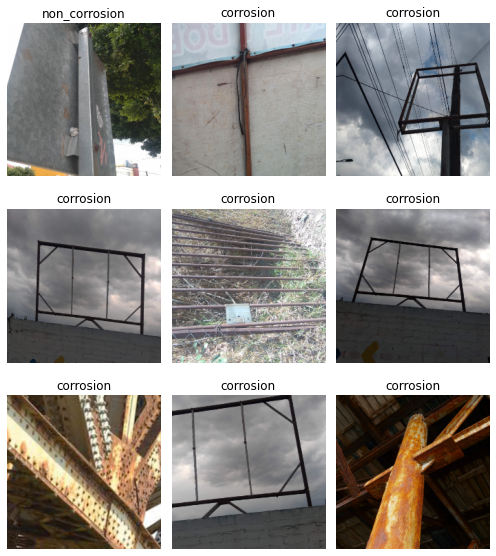

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

All photos was taked with Drone 

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['corrosion', 'non_corrosion'], 2, 178, 44)

#Training the model

##Creating a CNN 
With pre-trained model resnet34

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

In [ ]:
learn.save('stage-1')

Taking all the dataset with unfreeze command 

In [ ]:
learn.unfreeze()

run the command line of learning rate finder and plot it



In [ ]:
learn.lr_find()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


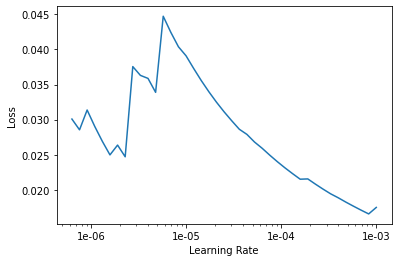

In [ ]:
learn.recorder.plot()

Choose the negative slope (bigger), where the model is training in the best way

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(2e-5,1e-4))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

In [ ]:
learn.save('stage-2')

#How the data is 
#How the training was...

In [ ]:
learn.load('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

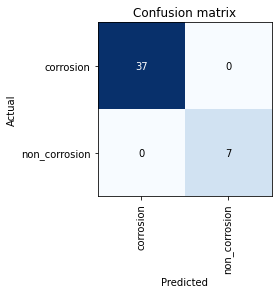

In [ ]:
interp.plot_confusion_matrix()

#Turn on the model 

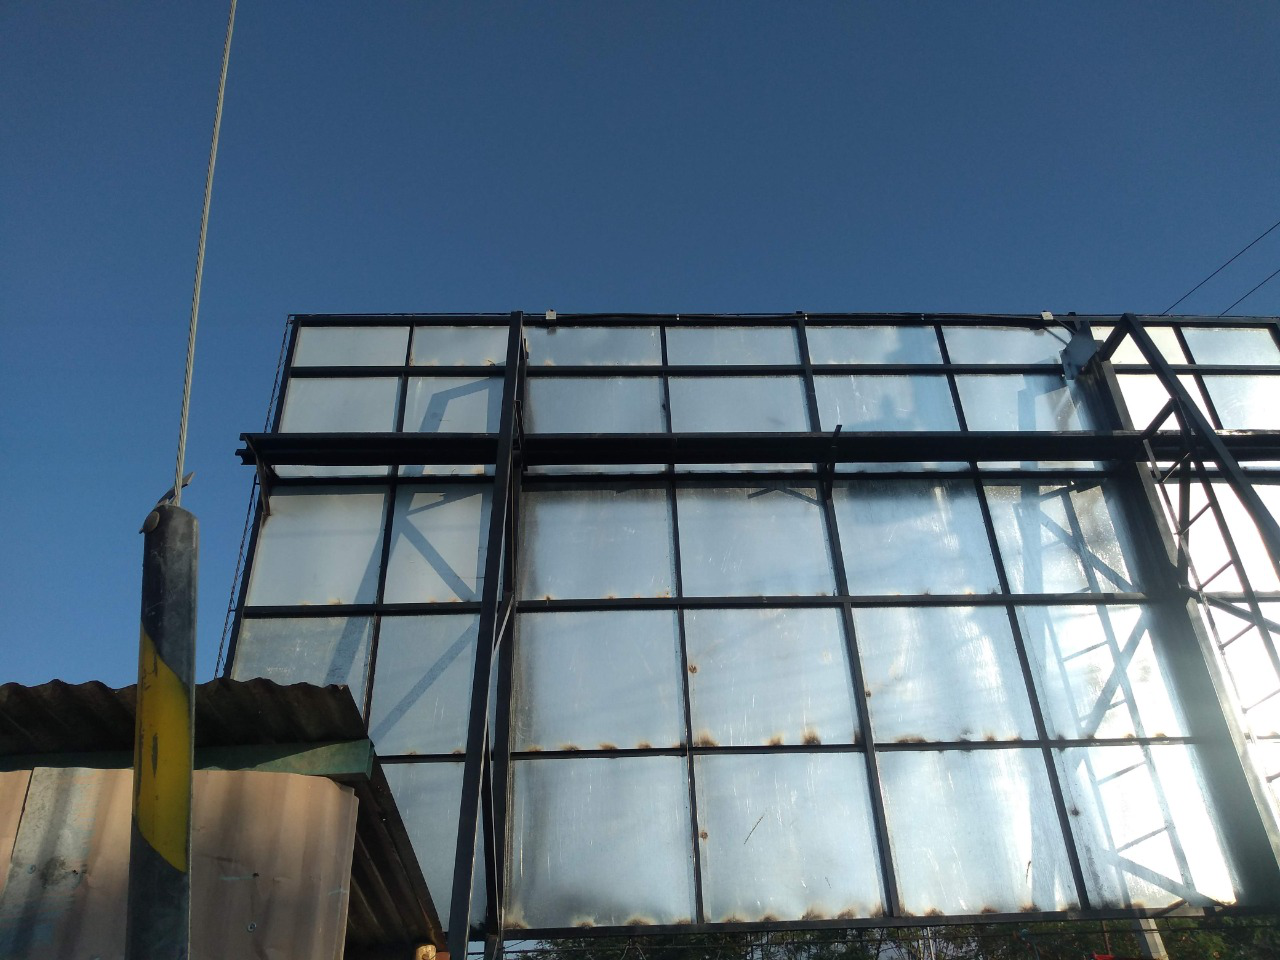

In [ ]:
img = open_image(path/'/content/drive/MyDrive/Test/Oaxaca_.jpeg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


'non_corrosion'

In [ ]:
!pip install pillow

In [ ]:
import PIL.Image

In [ ]:
!pip install gpsphoto

!pip install ExifRead
!pip install piexif==0.7.1

In [ ]:

import exifread
# Get the data from image file and return a dictionary


In [ ]:
from GPSPhoto import gpsphoto

In [ ]:
data = gpsphoto.getGPSData('/content/drive/MyDrive/Test/Oaxaca.jpg')
print(data['Latitude'], data['Longitude'])

17.064857 -96.67832802777778


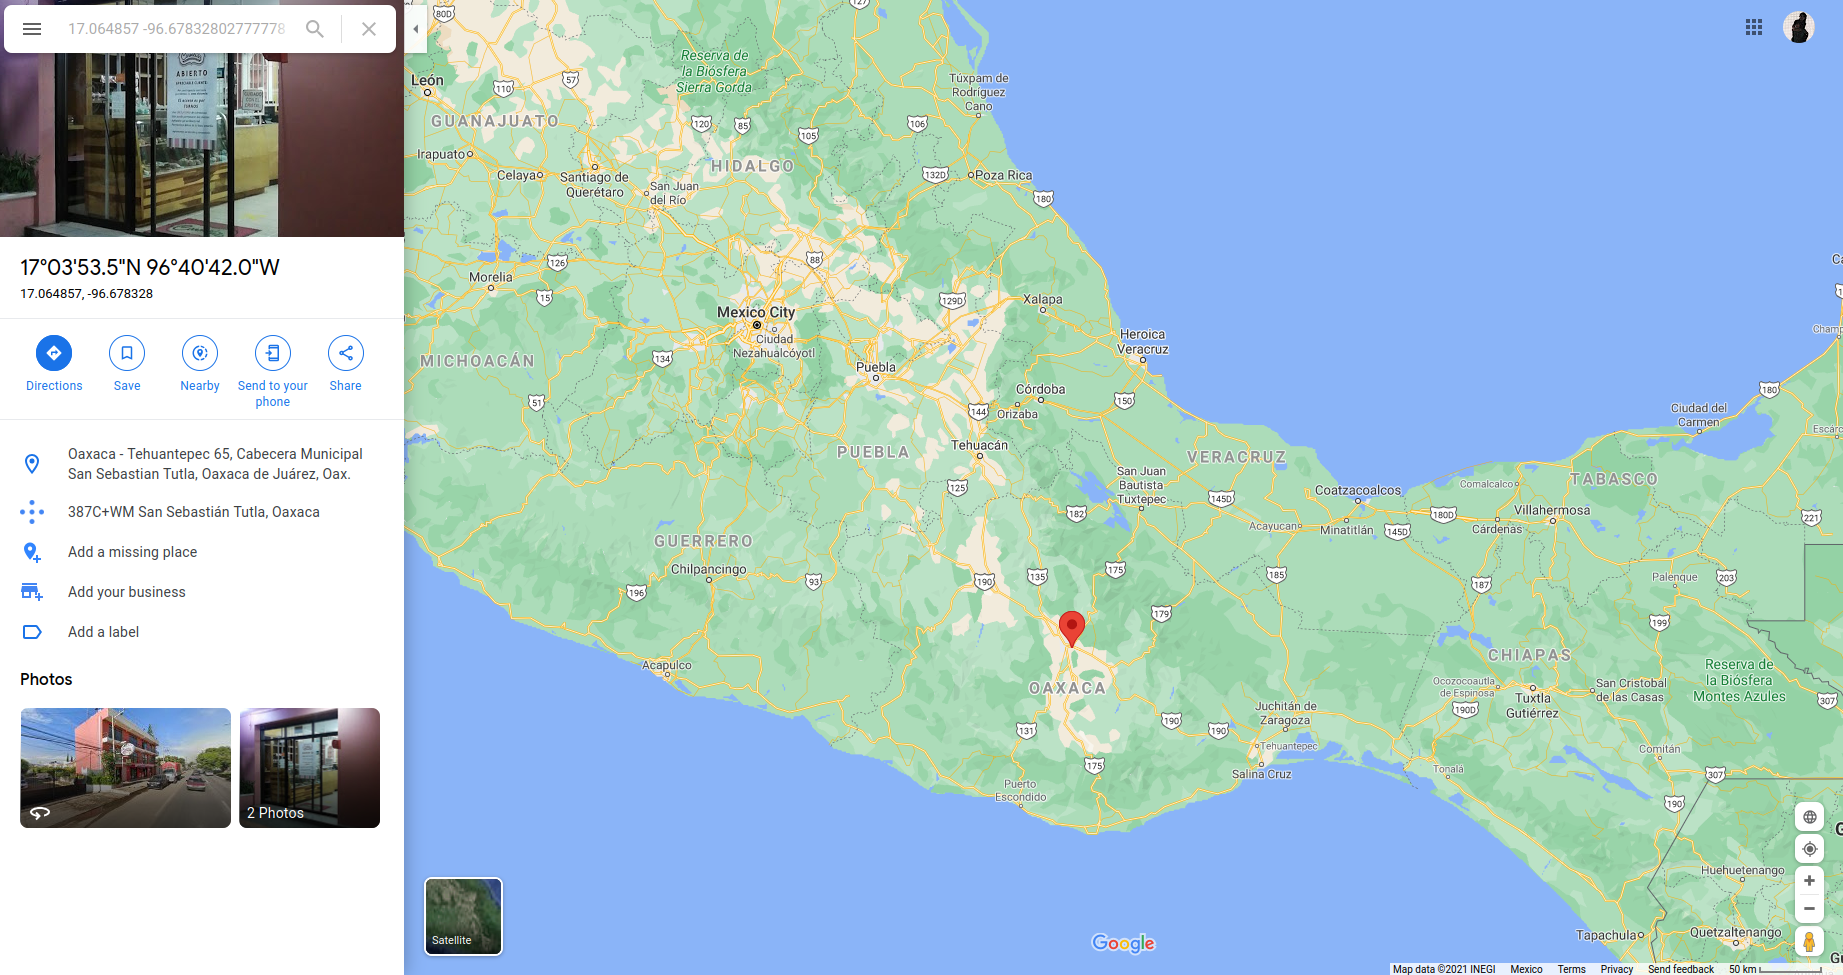